In [1]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import calendar
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv('US_WeatherEvents_2016-2019.csv')

In [3]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [4]:
df.describe()

,LocationLat,LocationLng,ZipCode
count,5.059833e+06,5.059833e+06,5.021148e+06
mean,3.882645e+01,-9.203908e+01,5.277158e+04
std,5.489153e+00,1.337799e+01,2.555838e+04
min,2.455710e+01,-1.245550e+02,1.022000e+03
25%,3.460690e+01,-9.800580e+01,3.172100e+04
50%,3.945200e+01,-9.011010e+01,5.450100e+04
75%,4.311110e+01,-8.215590e+01,7.364700e+04
max,4.894020e+01,-6.779280e+01,9.936200e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059833 entries, 0 to 5059832
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   AirportCode     object 
 7   LocationLat     float64
 8   LocationLng     float64
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 501.8+ MB


In [6]:
df.isnull().sum()

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
AirportCode           0
LocationLat           0
LocationLng           0
City               9087
County                0
State                 0
ZipCode           38685
dtype: int64

In [7]:
df = df.fillna(df.median())
table_1 = df.groupby(['City','Type']).count()
table_1 = table_1.reset_index()

list_of_dic = []
label = table_1.City[0]
list_val = {}
for index,row in table_1.iterrows():   
    if row['City'] != label:
        label = row['City']
        list_of_dic.append(list_val)
        list_val = {}
        list_val['City'] = row['City']
        list_val[row['Type']] = row['EventId']
       
    else:
        list_val['City'] = row['City']
        list_val[row['Type']] = row['EventId']

data = pd.DataFrame()
for dic in list_of_dic:
    data = data.append(dic, ignore_index=True)

data = data.fillna(0)
df = df.merge(data,on = 'City')

In [8]:
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])
df['EndTime(UTC)'] = pd.to_datetime(df['EndTime(UTC)'])

df['Start_year'] = df['StartTime(UTC)'].dt.year
df['Start_month'] = df['StartTime(UTC)'].dt.month
df['Start_week'] = df['StartTime(UTC)'].dt.week
df['Start_weekday'] = df['StartTime(UTC)'].dt.weekday
df['Start_day'] = df['StartTime(UTC)'].dt.day

df['end_year'] = df['EndTime(UTC)'].dt.year
df['end_month'] = df['EndTime(UTC)'].dt.month
df['end_week'] = df['EndTime(UTC)'].dt.week
df['end_weekday'] = df['EndTime(UTC)'].dt.weekday
df['end_day'] = df['EndTime(UTC)'].dt.day

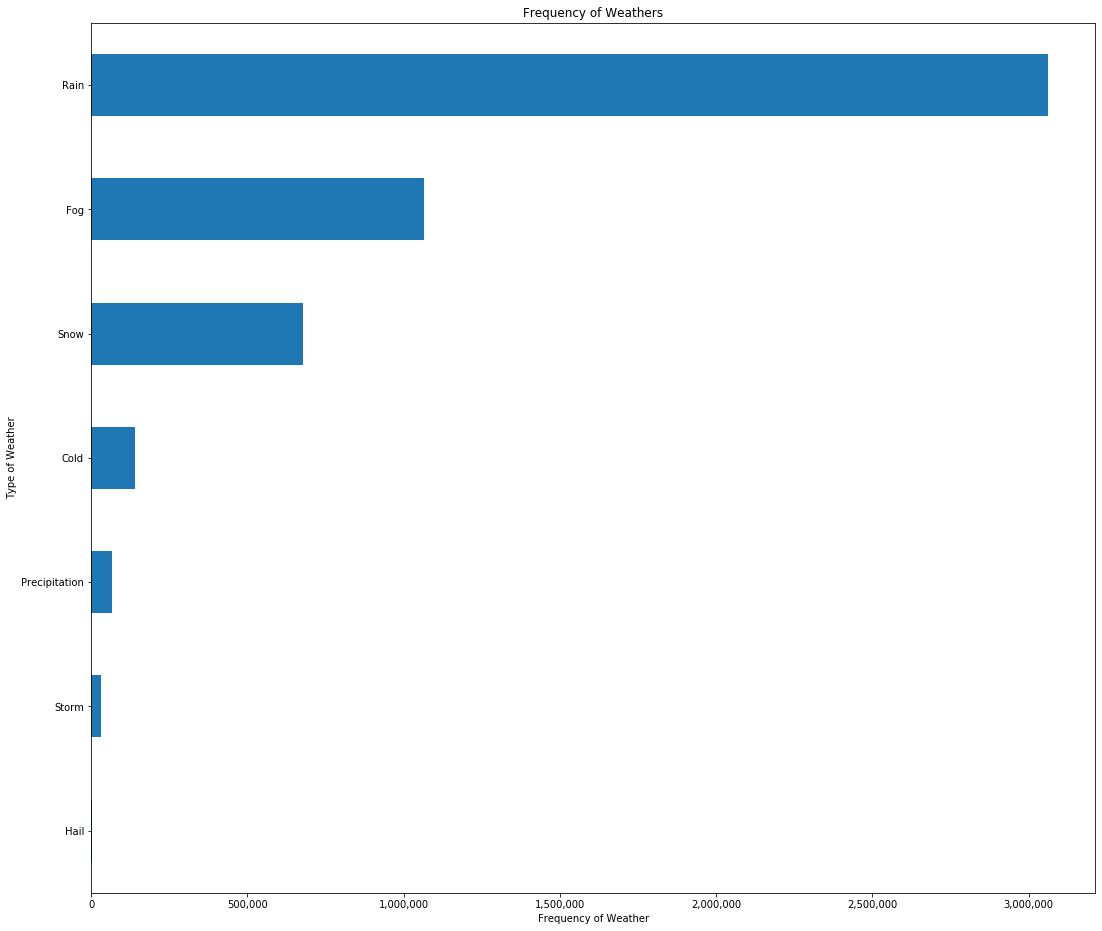

In [9]:
weather_type_df = df['Type'].value_counts(ascending=True)
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Weathers")
plt.xlabel("Frequency of Weather")
plt.ylabel("Type of Weather")
ax = weather_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [10]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,...,Start_year,Start_month,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,2,6,2016,1,1,3,7
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,3,7,2016,1,1,3,7
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,3,7,2016,1,1,3,7
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,4,8,2016,1,1,4,8
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,4,8,2016,1,1,4,8


In [11]:
weather_categories = df['Type'].value_counts()
weather_category_names = weather_categories.index

In [12]:
def plot_temporal_feature(df, time_feature, weather_category_names, feature, xaxis_formatter=None, xtick_inc=None):

    fig = plt.figure(figsize=(50, 100))
    
    for i in range(len(weather_category_names)):
        p = plt.subplot(10, 4, i+1)
        weather = weather_category_names[i]
        cur_weather_data = df[df[feature] == weather]
        temporal_data = cur_weather_data[time_feature].value_counts().sort_index()
        sns.lineplot(data=temporal_data)
        if xtick_inc:
            plt.xticks(np.arange(df[time_feature].unique().min(),df[time_feature].unique().max()+1, xtick_inc))
        plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
        if xaxis_formatter:
            p.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: xaxis_formatter(x)))
        plt.ylabel("Frequency of Weather", fontsize=25)
        time_feature_str = str(time_feature).capitalize()
        plt.xlabel(time_feature_str, fontsize=25)
        plt.title("%s (%s)" % (weather, 'per '+ time_feature_str), fontsize=30)
    

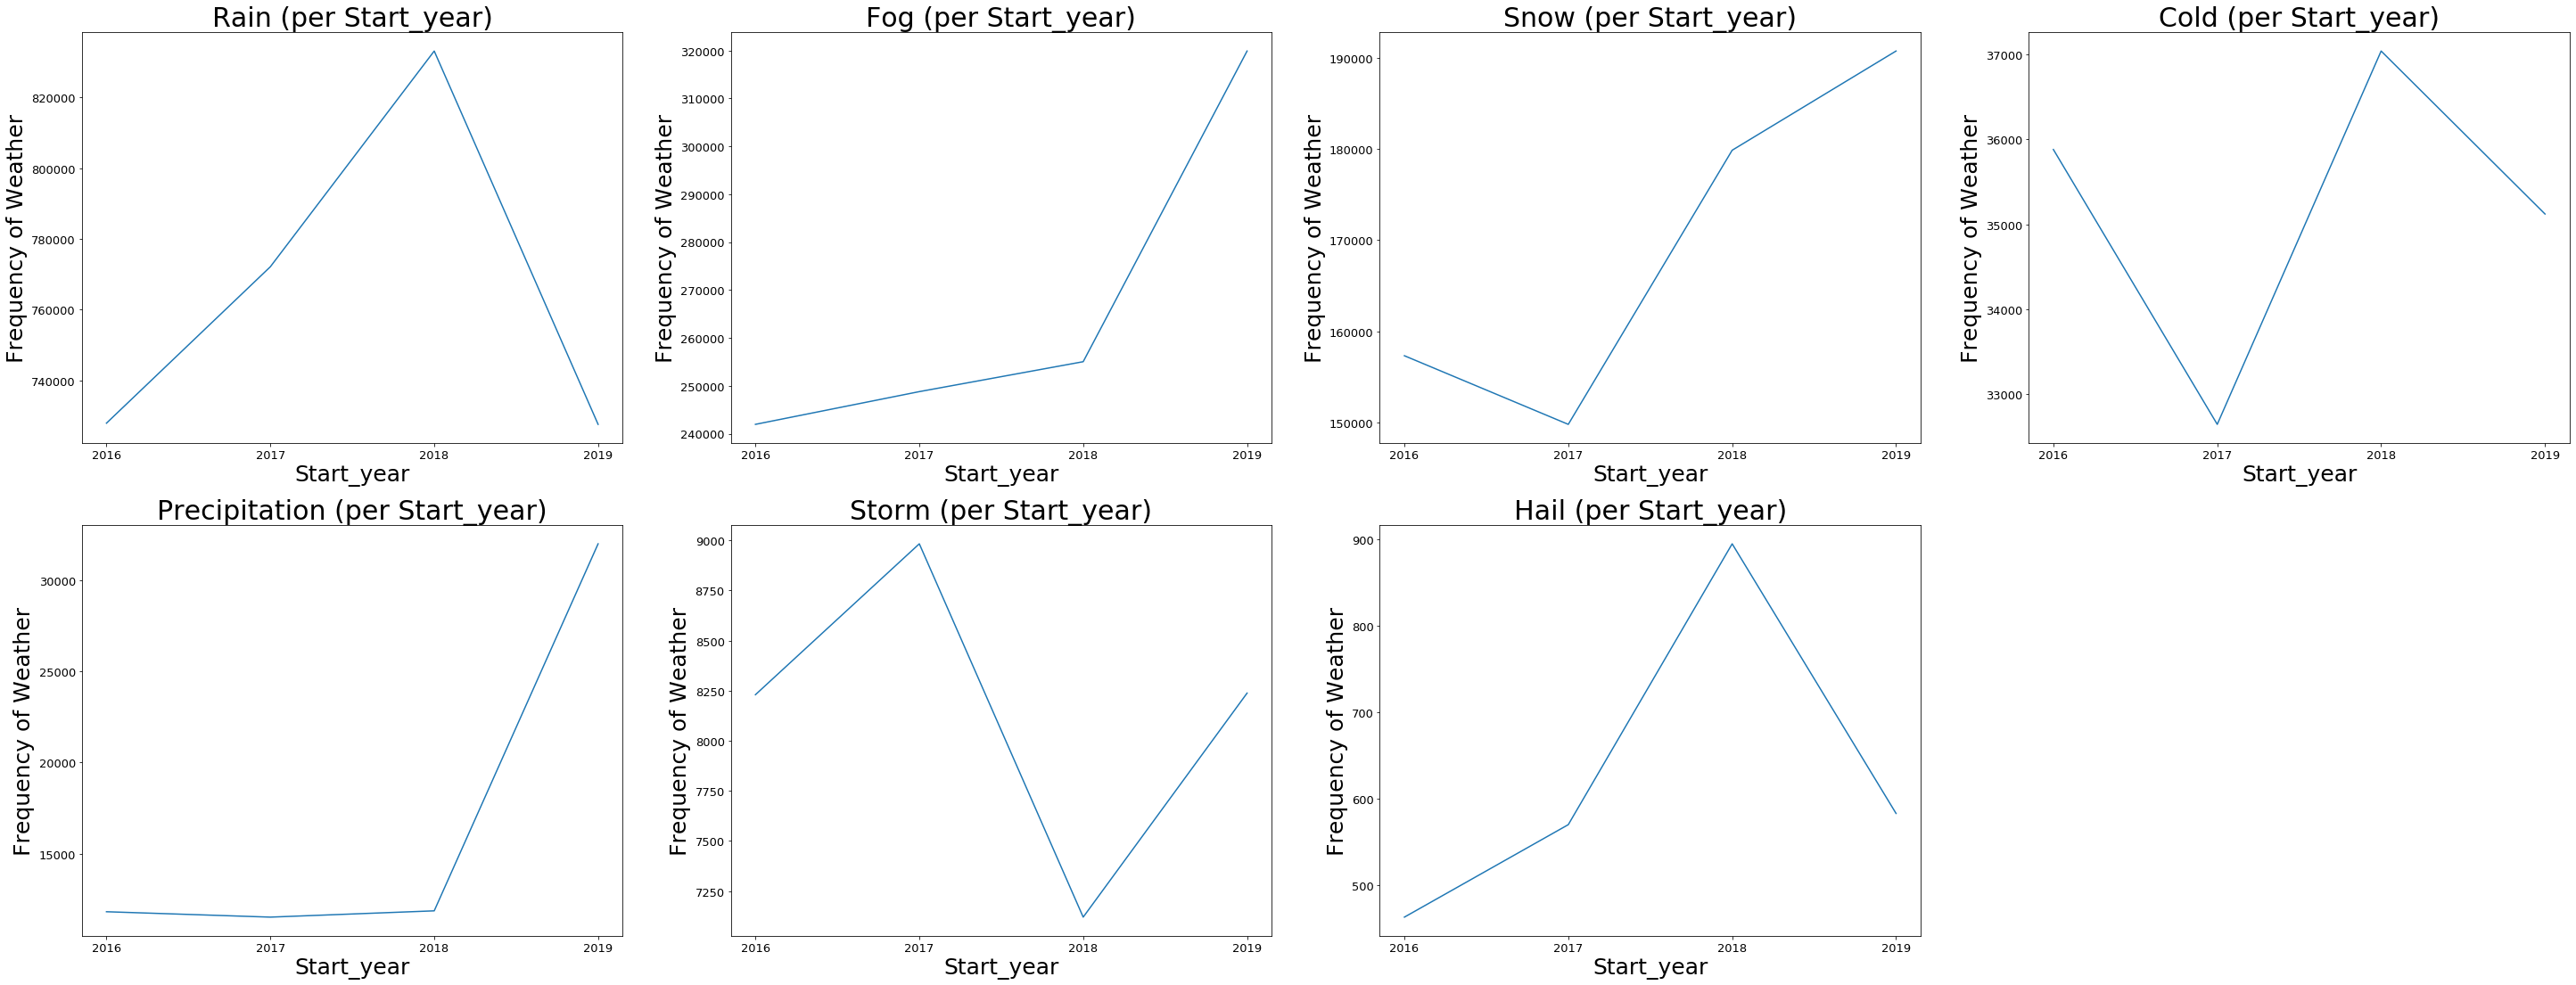

In [13]:
plot_temporal_feature(df, 'Start_year', weather_category_names, 'Type', xtick_inc=1,)

In [14]:
weather_serverity = df['Severity'].value_counts()
weather_serverity_names = weather_serverity.index

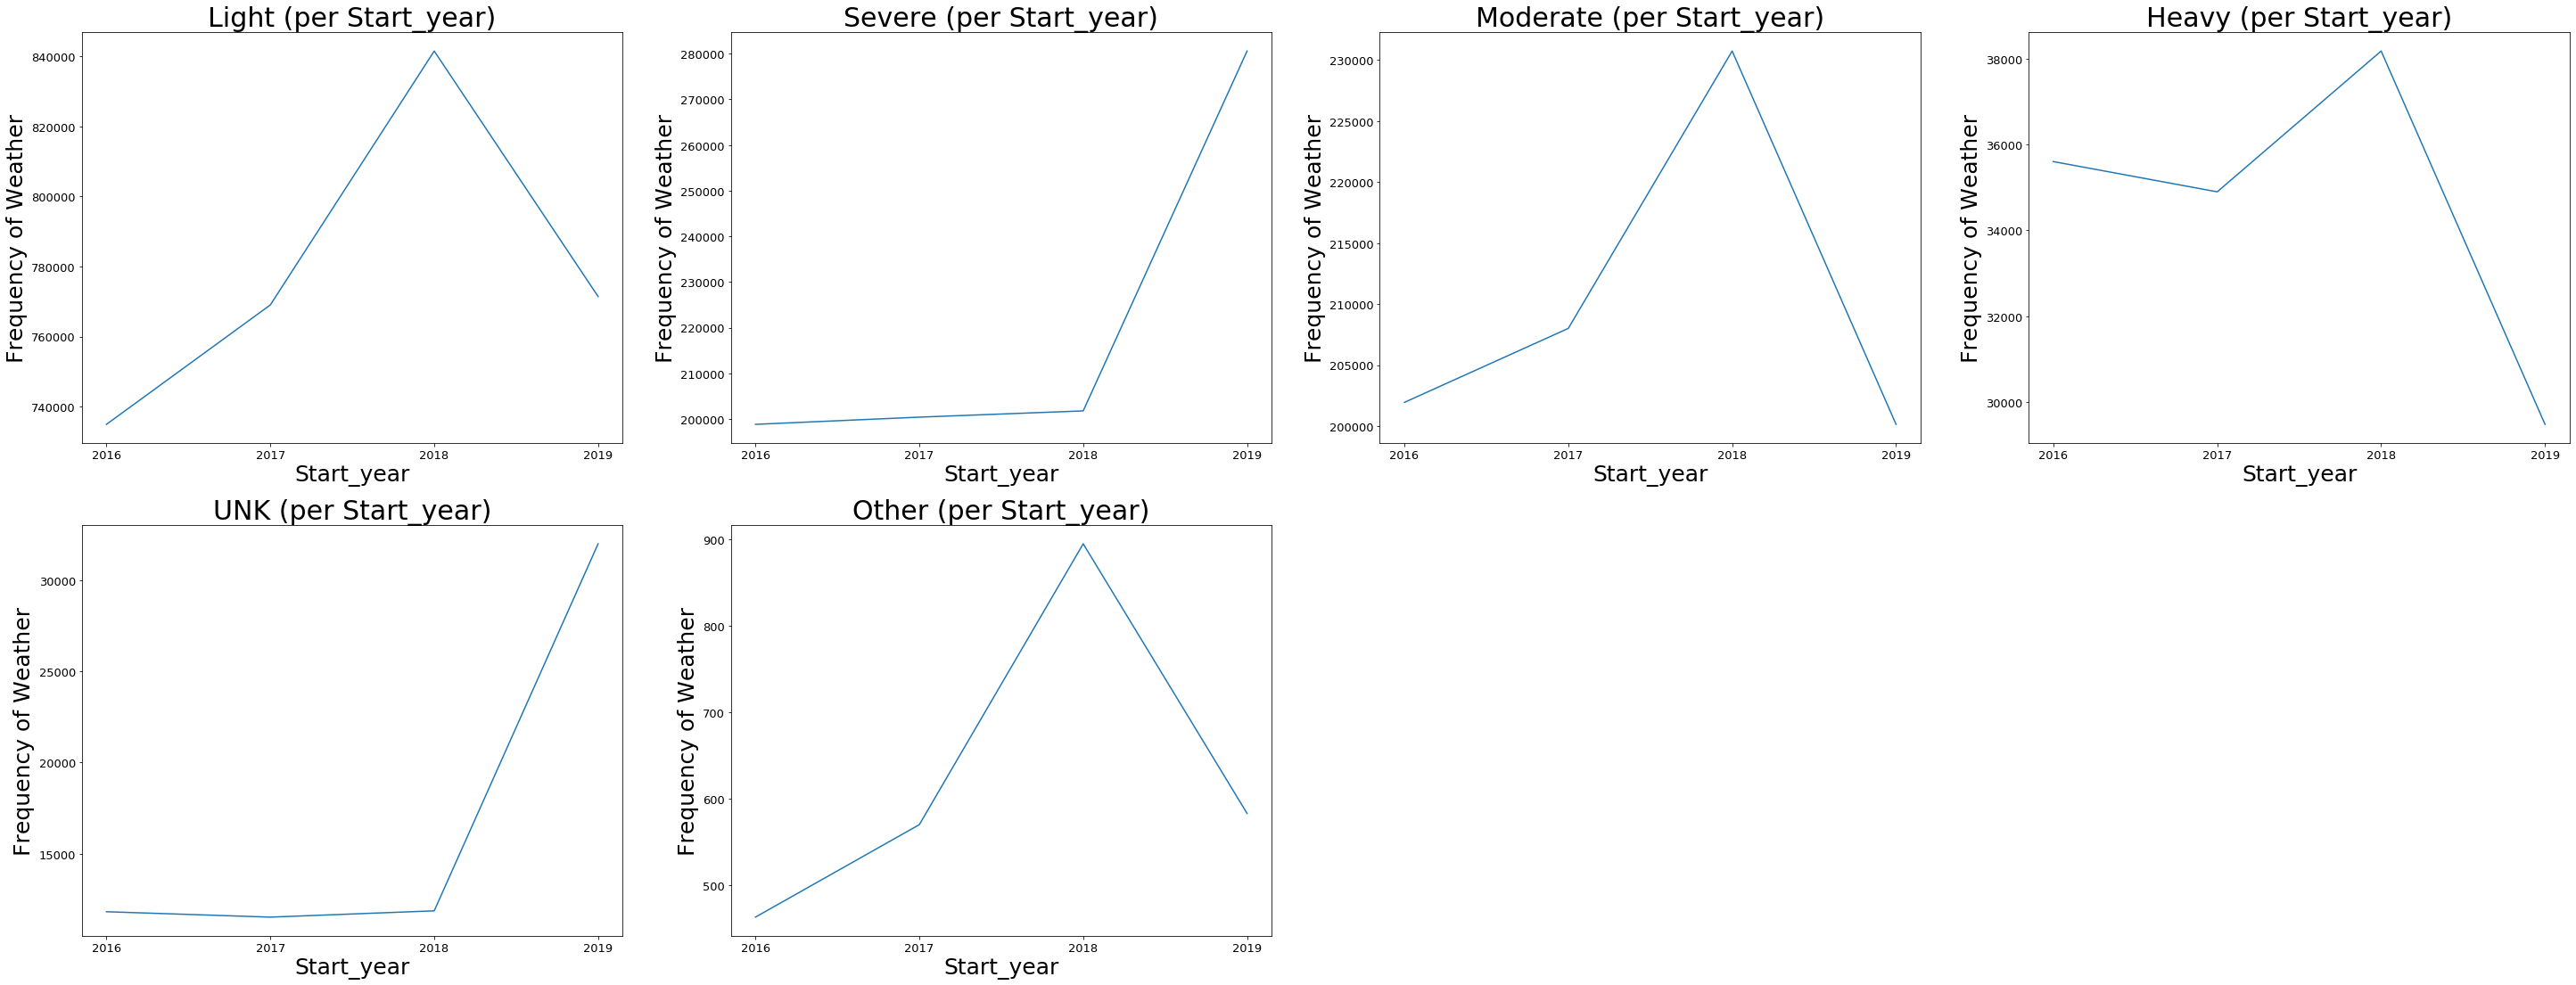

In [15]:
plot_temporal_feature(df, 'Start_year', weather_serverity_names, 'Severity', xtick_inc=1)

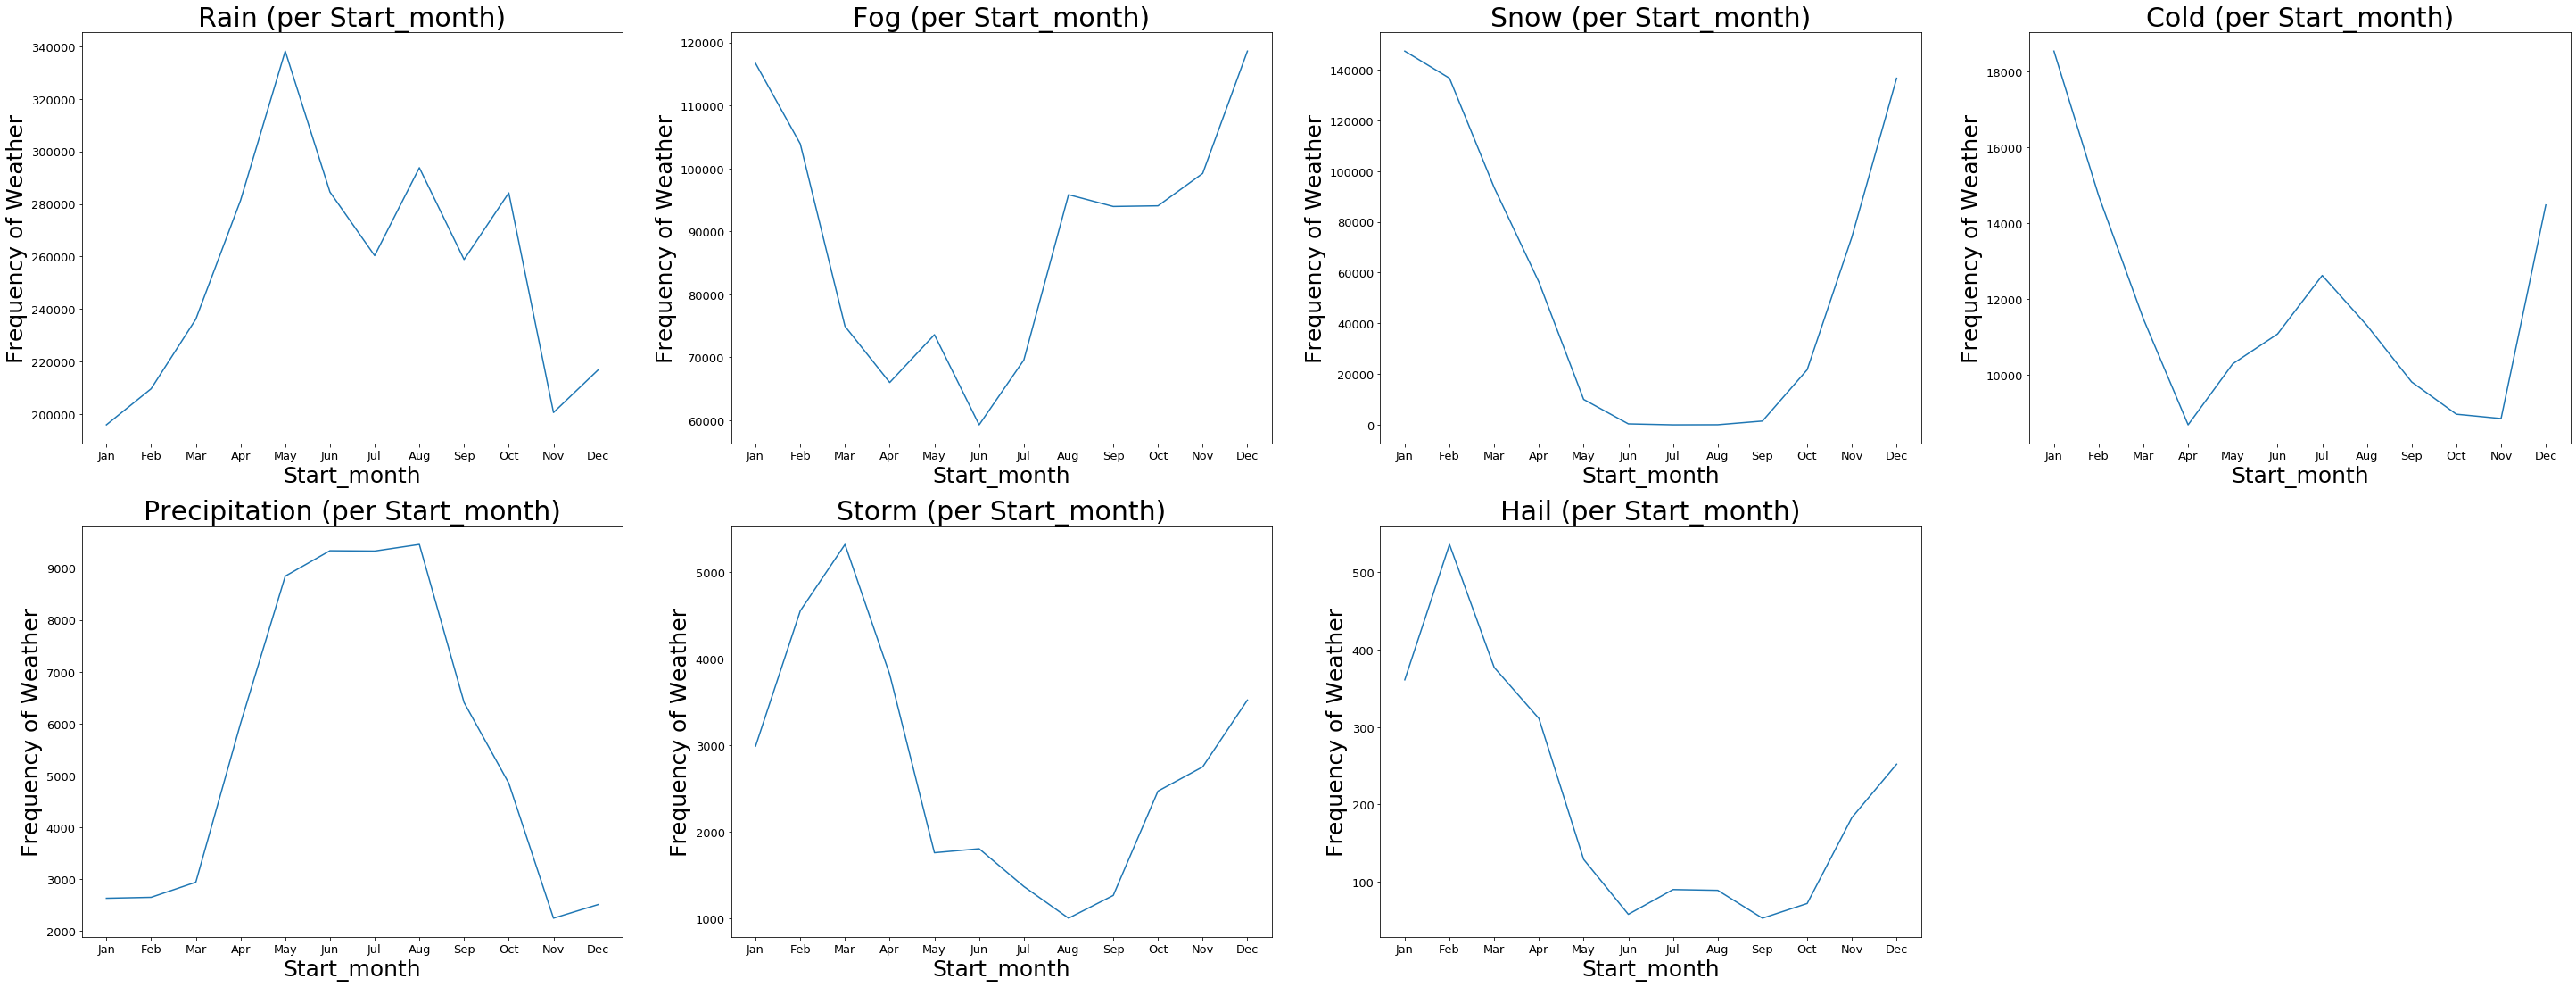

In [16]:
def convert_month(num):
    return calendar.month_abbr[num]

plot_temporal_feature(df, 'Start_month', weather_category_names, 'Type', convert_month, xtick_inc=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5047188 entries, 0 to 5047187
Data columns (total 30 columns):
 #   Column          Dtype         
---  ------          -----         
 0   EventId         object        
 1   Type            object        
 2   Severity        object        
 3   StartTime(UTC)  datetime64[ns]
 4   EndTime(UTC)    datetime64[ns]
 5   TimeZone        object        
 6   AirportCode     object        
 7   LocationLat     float64       
 8   LocationLng     float64       
 9   City            object        
 10  County          object        
 11  State           object        
 12  ZipCode         float64       
 13  Cold            float64       
 14  Fog             float64       
 15  Precipitation   float64       
 16  Rain            float64       
 17  Snow            float64       
 18  Storm           float64       
 19  Hail            float64       
 20  Start_year      int64         
 21  Start_month     int64         
 22  Start_week      in

In [18]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,...,Start_year,Start_month,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,2,6,2016,1,1,3,7
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,3,7,2016,1,1,3,7
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,3,7,2016,1,1,3,7
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,4,8,2016,1,1,4,8
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016,1,1,4,8,2016,1,1,4,8


In [19]:
df.describe()

,LocationLat,LocationLng,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail,Start_year,Start_month,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day
count,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06,5.047188e+06
mean,3.883042e+01,-9.202712e+01,5.278644e+04,1.127780e+02,9.104938e+02,5.739715e+01,2.609570e+03,5.510527e+02,2.508292e+01,2.191536e+00,2.017549e+03,6.392245e+00,2.584169e+01,2.986285e+00,1.568383e+01,2.017549e+03,6.391511e+00,2.583350e+01,2.984510e+00,1.567835e+01
std,5.489482e+00,1.337626e+01,2.549209e+04,1.832493e+02,8.523570e+02,1.143434e+02,2.206543e+03,6.346931e+02,1.248287e+02,9.521379e+00,1.112387e+00,3.569315e+00,1.559209e+01,2.005184e+00,8.807132e+00,1.112426e+00,3.569347e+00,1.559130e+01,2.005022e+00,8.807105e+00
min,2.455710e+01,-1.245550e+02,1.022000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.462170e+01,-9.799460e+01,3.176800e+04,2.000000e+01,4.110000e+02,1.400000e+01,1.429000e+03,4.600000e+01,1.000000e+00,0.000000e+00,2.017000e+03,3.000000e+00,1.200000e+01,1.000000e+00,8.000000e+00,2.017000e+03,3.000000e+00,1.200000e+01,1.000000e+00,8.000000e+00
50%,3.945200e+01,-9.013140e+01,5.450100e+04,4.800000e+01,6.390000e+02,3.200000e+01,1.953000e+03,3.780000e+02,5.000000e+00,0.000000e+00,2.018000e+03,6.000000e+00,2.500000e+01,3.000000e+00,1.600000e+01,2.018000e+03,6.000000e+00,2.500000e+01,3.000000e+00,1.600000e+01
75%,4.311110e+01,-8.209860e+01,7.352100e+04,1.140000e+02,1.058000e+03,5.800000e+01,3.067000e+03,8.230000e+02,1.600000e+01,0.000000e+00,2.019000e+03,1.000000e+01,4.000000e+01,5.000000e+00,2.300000e+01,2.019000e+03,1.000000e+01,4.000000e+01,5.000000e+00,2.300000e+01
max,4.894020e+01,-6.779280e+01,9.936200e+04,1.460000e+03,6.067000e+03,2.308000e+03,1.582000e+04,4.622000e+03,2.127000e+03,2.340000e+02,2.019000e+03,1.200000e+01,5.300000e+01,6.000000e+00,3.100000e+01,2.019000e+03,1.200000e+01,5.300000e+01,6.000000e+00,3.100000e+01


                         City  Heavy   Light  Moderate  Severe
0                   Abbeville  100.0  2104.0     392.0   829.0
1                    Aberdeen  149.0  3576.0    2549.0  2076.0
2     Aberdeen Proving Ground   19.0   990.0     153.0   254.0
3                     Abilene   78.0   852.0     301.0   210.0
4                    Abingdon  107.0  2714.0     542.0   221.0
...                       ...    ...     ...       ...     ...
1710                    Yukon   46.0  1007.0     576.0   345.0
1711                     Yuma    5.0   153.0     106.0    72.0
1712               Zanesville   88.0  1939.0     640.0   469.0
1713                   Zapata   40.0  1038.0     309.0   311.0
1714              Zephyrhills  114.0  1649.0     302.0   616.0

[1715 rows x 5 columns]
      Heavy     Light  Moderate    Severe
0  0.043529  0.915846  0.170633  0.360854
1  0.030660  0.735841  0.524513  0.427183
2  0.018382  0.957792  0.148022  0.245736
3  0.083784  0.915183  0.323322  0.225573
4  0.0385

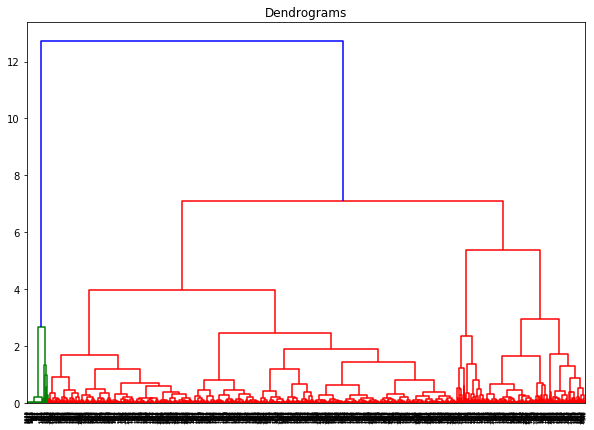

In [20]:
sevCityCom = df[['City', 'Severity']]
severity =  pd.get_dummies(sevCityCom['Severity'])
severity['City'] =  sevCityCom['City']
severity = severity.groupby('City').sum().reset_index()
severity = severity.drop(['UNK', 'Other'], axis=1) #dropping Unknown and Other 
severity.head()
len(sevCityCom)

# kMeanDf = severity[['City']]
# kMeanDf
print(severity)
# sevCityCom.head()
# kMeanDf = severity[['City']]
severity.drop('City', axis=1, inplace=True)


from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch

normalizedSeverity = normalize(severity)
normalizedSeverity = pd.DataFrame(normalizedSeverity, columns=severity.columns)
print(normalizedSeverity.head())


plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(normalizedSeverity, method='ward'))

# dendrogram = sch.dendrogram(sch.linkage(severity, method  = "ward"))
# plt.title('Dendrogram')
# plt.xlabel('Severity')
# plt.ylabel('Euclidean distances')
# plt.show()
# X = df.drop(['Type','StartTime(UTC)','EndTime(UTC)'],axis = 1).head(10000)
# y = df.Type.head(10000)


# le = preprocessing.LabelEncoder()
# for name in X.columns:
#     if X[name].dtypes == "O":
#         print(name)
#         X[name] = X[name].astype(str)
#         le.fit(X[name])
#         X[name] = le.transform(X[name])
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


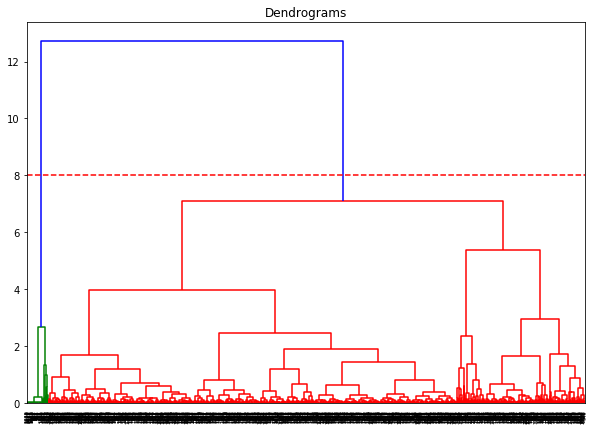

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(normalizedSeverity, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
cluster.fit_predict(normalizedSeverity)
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=8)

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA().fit(normalizedSeverity)
pcaSeverity = pca.transform(normalizedSeverity)
print("Explained Variance Ratio of each component: ")
for i in range(len(pca.explained_variance_ratio_)):
    print("\n")
    print(i+1,":", pca.explained_variance_ratio_[i]*100)
print('\n')
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)
print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)

Explained Variance Ratio of each component: 


1 : 71.14908969233399


2 : 23.022476359740914


3 : 5.086167706401165


4 : 0.7422662415239218


Total sum (%):  100.0
Explained variance of the first two components (%):  71.14908969233399


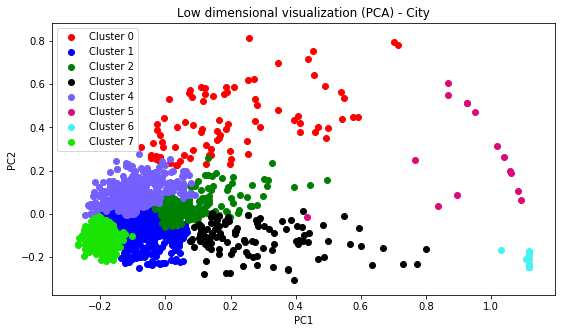

In [51]:
# plt.figure(figsize=(10, 7))  
# plt.scatter(normalizedSeverity['Heavy'], normalizedSeverity['Light'], c=cluster.labels_) 
# Moderate  Severe


arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8 = ([] for i in range(8))

for i in range(len(pcaSeverity)):
    if cluster.labels_[i] == 0:
        arr1.append(pcaSeverity[i])
    if cluster.labels_[i] == 1:
        arr2.append(pcaSeverity[i])
    if cluster.labels_[i] == 2:
        arr3.append(pcaSeverity[i])
    if cluster.labels_[i] == 3:
        arr4.append(pcaSeverity[i])
    if cluster.labels_[i] == 4:
        arr5.append(pcaSeverity[i])
    if cluster.labels_[i] == 5:
        arr6.append(pcaSeverity[i])
    if cluster.labels_[i] == 6:
        arr7.append(pcaSeverity[i])
    if cluster.labels_[i] == 7:
        arr8.append(pcaSeverity[i])
        
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
arr4 = np.array(arr4)
arr5 = np.array(arr5)
arr6 = np.array(arr6)
arr7 = np.array(arr7)
arr8 = np.array(arr8)


# import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(cluster.labels_)
plt.figure(figsize=(9,5))
plt.scatter(arr1[:,0], arr1[:,1], c='red', label='Cluster 0')
plt.scatter(arr2[:,0], arr2[:,1], c='blue', label='Cluster 1')
plt.scatter(arr3[:,0], arr3[:,1], c='green', label='Cluster 2')
plt.scatter(arr4[:,0], arr4[:,1], c='black', label='Cluster 3')
plt.scatter(arr5[:,0], arr5[:,1], c='#7560FF', label='Cluster 4')
plt.scatter(arr6[:,0], arr6[:,1], c='#D90B78', label='Cluster 5')
plt.scatter(arr7[:,0], arr7[:,1], c='#47F2F2', label='Cluster 6')
plt.scatter(arr8[:,0], arr8[:,1], c='#19E404', label='Cluster 7')

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Low dimensional visualization (PCA) - City');